# జన్యు అల్గోరిథమ్స్

ఈ నోట్‌బుక్ [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) యొక్క భాగం.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## కొంత సిద్ధాంతం

**జెనెటిక్ అల్గోరిథమ్స్** (GA) అనేవి AI లో **వికాసాత్మక దృష్టికోణం** ఆధారంగా ఉంటాయి, ఇందులో జనాభా అభివృద్ధి పద్ధతులను ఉపయోగించి ఒక నిర్దిష్ట సమస్యకు ఉత్తమ పరిష్కారాన్ని పొందుతారు. ఇవి 1975లో [జాన్ హెన్రీ హోలాండ్](https://en.wikipedia.org/wiki/John_Henry_Holland) ద్వారా ప్రతిపాదించబడ్డాయి.

జెనెటిక్ అల్గోరిథమ్స్ ఈ క్రింది ఆలోచనలపై ఆధారపడి ఉంటాయి:
* సమస్యకు సరైన పరిష్కారాలను **జీన్స్** రూపంలో ప్రాతినిధ్యం చేయవచ్చు
* **క్రాసోవర్** ద్వారా రెండు పరిష్కారాలను కలిపి కొత్త సరైన పరిష్కారాన్ని పొందవచ్చు
* **సెలెక్షన్** ద్వారా కొన్ని **ఫిట్‌నెస్ ఫంక్షన్** ఉపయోగించి మరింత ఉత్తమ పరిష్కారాలను ఎంచుకుంటారు
* **మ్యూటేషన్స్** ద్వారా ఆప్టిమైజేషన్‌ను అస్థిరం చేసి స్థానిక కనిష్టం నుండి బయటపడతారు

మీరు జెనెటిక్ అల్గోరిథమ్ అమలు చేయాలనుకుంటే, ఈ క్రింది అంశాలు అవసరం:

 * మన సమస్య పరిష్కారాలను **జీన్స్** $g\in\Gamma$ రూపంలో కోడింగ్ చేసే పద్ధతిని కనుగొనాలి
 * జీన్స్ సెట్ $\Gamma$ పై **ఫిట్‌నెస్ ఫంక్షన్** $\mathrm{fit}: \Gamma\to\mathbb{R}$ నిర్వచించాలి. చిన్న ఫంక్షన్ విలువలు మెరుగైన పరిష్కారాలకు సూచిస్తాయి.
 * రెండు జీన్స్ కలిపి కొత్త సరైన పరిష్కారాన్ని పొందడానికి **క్రాసోవర్** యంత్రాంగం నిర్వచించాలి $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * **మ్యూటేషన్** యంత్రాంగం నిర్వచించాలి $\mathrm{mutate}: \Gamma\to\Gamma$.
చాలా సందర్భాల్లో, క్రాసోవర్ మరియు మ్యూటేషన్ అనేవి సంఖ్యా శ్రేణులు లేదా బిట్ వెక్టర్లుగా ఉన్న జీన్స్‌ను సులభంగా మార్చే అల్గోరిథమ్స్.

జెనెటిక్ అల్గోరిథమ్ యొక్క ప్రత్యేక అమలు సందర్భం నుండి సందర్భానికి మారవచ్చు, కానీ మొత్తం నిర్మాణం ఇలా ఉంటుంది:

1. ప్రారంభ జనాభా $G\subset\Gamma$ ఎంచుకోండి
2. ఈ దశలో అమలు చేయబోయే ఆపరేషన్‌ను యాదృచ్ఛికంగా ఎంచుకోండి: క్రాసోవర్ లేదా మ్యూటేషన్
3. **క్రాసోవర్**:
  * యాదృచ్ఛికంగా రెండు జీన్స్ $g_1, g_2 \in G$ ఎంచుకోండి
  * క్రాసోవర్ గణన చేయండి $g=\mathrm{crossover}(g_1,g_2)$
  * $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ లేదా $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ అయితే - జనాభాలో సంబంధిత జీన్‌ను $g$ తో మార్చండి.
4. **మ్యూటేషన్** - యాదృచ్ఛికంగా ఒక జీన్ $g\in G$ ఎంచుకుని దాన్ని $\mathrm{mutate}(g)$ తో మార్చండి
5. దశ 2 నుండి పునరావృతం చేయండి, సరిపడా చిన్న $\mathrm{fit}$ విలువ పొందేవరకు లేదా దశల పరిమితి చేరేవరకు.

GA ద్వారా సాధారణంగా పరిష్కరించే పనులు:
1. షెడ్యూల్ ఆప్టిమైజేషన్
2. ఉత్తమ ప్యాకింగ్
3. ఉత్తమ కటింగ్
4. సమగ్ర శోధన వేగవంతం చేయడం


## సమస్య 1: న్యాయమైన ఖజానా విభజన

**పని**:  
రెండు వ్యక్తులు వివిధ పరిమాణాల (మరియు అనుగుణంగా, వివిధ ధరల) వజ్రాలు ఉన్న ఒక ఖజానాను కనుగొన్నారు. వారు ఖజానాను రెండు భాగాలుగా విభజించాలి, అప్పుడు ధరల మధ్య తేడా 0 (లేదా గరిష్టంగా తక్కువ)గా ఉండాలి.

**సాధారణ నిర్వచనం**:  
మాకు ఒక సంఖ్యల సమాహారం $S$ ఉంది. దాన్ని రెండు ఉపసమూహాలుగా విభజించాలి $S_1$ మరియు $S_2$, ఇలాగా $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ మరియు $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

ముందుగా, సమాహారం $S$ ను నిర్వచిద్దాం:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

ప్రతి సాధ్యమైన పరిష్కారాన్ని బైనరీ వెక్టర్ $B\in\{0,1\}^N$ ద్వారా సంకేతీకరించుకుందాం, ఇక్కడ $i$-వ స్థానంలో ఉన్న సంఖ్య అసలు సెట్ $S$ లోని $i$-వ సంఖ్య ఏ సెట్ ($S_1$ లేదా $S_2$) కు చెందుతుందో చూపిస్తుంది. `generate` ఫంక్షన్ ఆ రాండమ్ బైనరీ వెక్టర్లను ఉత్పత్తి చేస్తుంది.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


ఇప్పుడు "cost" ను లెక్కించే `fit` ఫంక్షన్ ను నిర్వచిద్దాం. ఇది రెండు సెట్‌లు, $S_1$ మరియు $S_2$ యొక్క మొత్తం మధ్య తేడా అవుతుంది:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

ఇప్పుడు మ్యూటేషన్ మరియు క్రాసోవర్ కోసం ఫంక్షన్లను నిర్వచించాలి:
* మ్యూటేషన్ కోసం, ఒక రాండమ్ బిట్‌ను ఎంచుకుని దాన్ని నెగేట్ చేస్తాము (0 నుండి 1 కి లేదా 1 నుండి 0 కి మార్చడం)
* క్రాసోవర్ కోసం, ఒక వెక్టర్ నుండి కొన్ని బిట్లు, మరొక వెక్టర్ నుండి కొన్ని బిట్లు తీసుకుంటాము. ఏ బిట్లు ఎక్కడి నుండి తీసుకోవాలో రాండమ్‌గా ఎంచుకోవడానికి అదే `generate` ఫంక్షన్‌ను ఉపయోగిస్తాము.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

పాప్యులేషన్ సైజు `pop_size` ఉన్న పరిష్కారాల ప్రారంభ జనాభా $P$ ను సృష్టిద్దాం:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

ఇప్పుడు, అభివృద్ధిని నిర్వహించడానికి ప్రధాన ఫంక్షన్. `n` అనేది అభివృద్ధి జరగాల్సిన దశల సంఖ్య. ప్రతి దశలో:
* 30% అవకాశంతో మ్యూటేషన్ చేస్తాము, మరియు అత్యల్ప `fit` ఫంక్షన్ ఉన్న మూలకాన్ని మ్యూటేట్ చేసిన మూలకంతో మార్చుతాము
* 70% అవకాశంతో క్రాసోవర్ చేస్తాము

ఫంక్షన్ ఉత్తమ పరిష్కారాన్ని (ఉత్తమ పరిష్కారానికి సంబంధించిన జీన్) మరియు ప్రతి పునరావృతంలో జనాభాలో కనిష్ట fit ఫంక్షన్ యొక్క చరిత్రను తిరిగి ఇస్తుంది.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


మేము `fit` ఫంక్షన్‌ను చాలా తగ్గించుకున్నామని మీరు చూడవచ్చు! మొత్తం జనాభా కోసం `fit` ఫంక్షన్ ప్రాసెస్ సమయంలో ఎలా ప్రవర్తిస్తుందో చూపించే గ్రాఫ్ ఇక్కడ ఉంది.


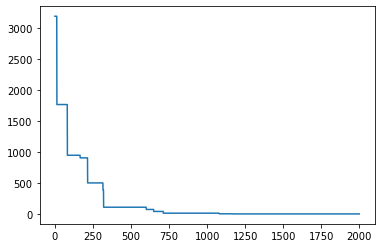

In [10]:
plt.plot(hist)
plt.show()

## సమస్య 2: N రాణులు సమస్య

**పని**:
మీకు $N \times N$ పరిమాణం గల చెస్ బోర్డు మీద $N$ రాణులను ఒకదానిపై ఒకటి దాడి చేయకుండా అమర్చాలి.

మొదటగా, జన్యు అల్గోరిథమ్స్ లేకుండా, పూర్తి శోధన ఉపయోగించి సమస్యను పరిష్కరించుకుందాం. బోర్డు స్థితిని $L$ అనే జాబితా ద్వారా సూచించవచ్చు, ఇందులో $i$-వ సంఖ్య $i$-వ వరుసలో రాణి యొక్క ఆడంబర స్థానం. ప్రతి పరిష్కారంలో ఒక్కో వరుసలో ఒక్కో రాణి మాత్రమే ఉంటుందని, ప్రతి వరుసలో రాణి తప్పకుండా ఉంటుందని ఇది స్పష్టంగా తెలుస్తుంది.

మా లక్ష్యం సమస్యకు మొదటి పరిష్కారాన్ని కనుగొనడం, ఆ తర్వాత శోధన ఆపడం. మీరు ఈ ఫంక్షన్‌ను సులభంగా విస్తరించి రాణుల కోసం అన్ని సాధ్యమైన స్థానాలను ఉత్పత్తి చేయవచ్చు.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


ఇప్పుడు అదే సమస్యను జెనెటిక్ అల్గోరిథం ఉపయోగించి పరిష్కరించుకుందాం. ఈ పరిష్కారం [ఈ బ్లాగ్ పోస్ట్](https://kushalvyas.github.io/gen_8Q.html) నుండి ప్రేరణ పొందింది.

ప్రతి పరిష్కారాన్ని $N$ పొడవైన అదే జాబితా ద్వారా సూచిస్తాము, మరియు `fit` ఫంక్షన్‌గా పరస్పరం దాడి చేసే రాణుల సంఖ్యను తీసుకుంటాము:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

ఫిట్‌నెస్ ఫంక్షన్ లెక్కించడం సమయం తీసుకుంటుంది కాబట్టి, ప్రతి పరిష్కారాన్ని ఫిట్‌నెస్ ఫంక్షన్ విలువతో పాటు జనాభాలో నిల్వ చేద్దాం. ప్రారంభ జనాభాను సృష్టిద్దాం:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

ఇప్పుడు మనం మ్యూటేషన్ మరియు క్రాసోవర్ ఫంక్షన్లను నిర్వచించాలి. క్రాసోవర్ అనేది రెండు జీన్లను కలిపే ప్రక్రియ, ఇది వాటిని ఏదైనా యాదృచ్ఛిక బిందువులో విభజించి, వేర్వేరు జీన్ల నుండి రెండు భాగాలను కలిపి ఒకటిగా చేయడం.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

మేము మెరుగైన ఫిట్‌నెస్ ఫంక్షన్‌తో మరిన్ని జీన్లను ఎంచుకోవడం ద్వారా జీన్ ఎంపిక ప్రక్రియను మెరుగుపరుస్తాము. జీన్ ఎంపిక చేసే అవకాశము ఫిట్‌నెస్ ఫంక్షన్‌పై ఆధారపడి ఉంటుంది:


In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

ఇప్పుడు ప్రధాన అభివృద్ధి లూప్‌ను నిర్వచిద్దాం. గత ఉదాహరణతో పోల్చితే లాజిక్‌ను కొంచెం భిన్నంగా చేస్తాము, దీని ద్వారా సృజనాత్మకంగా ఉండవచ్చని చూపించగలుగుతాము. మనం పర్ఫెక్ట్ సొల్యూషన్ (fitness function=0) వచ్చే వరకు లూప్ చేస్తాము, ప్రతి దశలో ప్రస్తుత తరం తీసుకుని అదే పరిమాణంలో కొత్త తరాన్ని ఉత్పత్తి చేస్తాము. ఇది `nxgeneration` ఫంక్షన్ ఉపయోగించి, క్రింది దశల ద్వారా చేయబడుతుంది:

1. అత్యంత తక్కువ ఫిట్‌నెస్ ఉన్న పరిష్కారాలను తొలగించండి - దీనికి `discard_unfit` ఫంక్షన్ ఉంది
1. తరానికి మరికొన్ని యాదృచ్ఛిక పరిష్కారాలను జోడించండి
1. ప్రతి కొత్త జీన్ కోసం క్రింది దశలను ఉపయోగించి `gen_size` పరిమాణంలో కొత్త తరాన్ని నింపండి:
    - రెండు యాదృచ్ఛిక జీన్లను ఫిట్‌నెస్ ఫంక్షన్‌కు అనుగుణంగా ఎంపిక చేయండి
    - ఒక క్రాసోవర్ లెక్కించండి
    - `mutation_prob` అవకాశంతో మ్యూటేషన్‌ను వర్తింపజేయండి


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

అత్యధికసార్లు మనం పరిష్కారాన్ని త్వరగా పొందగలుగుతామన్న విషయం ఆసక్తికరంగా ఉంటుంది, కానీ కొన్ని అరుదైన సందర్భాల్లో ఆప్టిమైజేషన్ స్థానిక కనిష్ఠానికి చేరుకుంటుంది, మరియు ప్రక్రియ చాలా కాలం నిలిచిపోతుంది. మీరు సగటు సమయాన్ని కొలవేటప్పుడు దీన్ని గమనించడం ముఖ్యం: ఎక్కువ సందర్భాల్లో జన్యు అల్గోరిథం పూర్తి శోధన కంటే వేగంగా ఉంటుంది, కానీ కొన్ని సందర్భాల్లో ఇది ఎక్కువ సమయం తీసుకోవచ్చు. ఈ సమస్యను అధిగమించడానికి, పరిగణించవలసిన తరం సంఖ్యను పరిమితం చేయడం సాధారణంగా మంచిది, మరియు పరిష్కారాన్ని కనుగొనలేకపోతే - మళ్లీ మొదలుపెట్టవచ్చు.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**అస్పష్టత**:  
ఈ పత్రాన్ని AI అనువాద సేవ [Co-op Translator](https://github.com/Azure/co-op-translator) ఉపయోగించి అనువదించబడింది. మేము ఖచ్చితత్వానికి ప్రయత్నించినప్పటికీ, ఆటోమేటెడ్ అనువాదాల్లో పొరపాట్లు లేదా తప్పిదాలు ఉండవచ్చు. మూల పత్రం దాని స్వదేశీ భాషలో అధికారిక మూలంగా పరిగణించాలి. ముఖ్యమైన సమాచారానికి, ప్రొఫెషనల్ మానవ అనువాదం సిఫార్సు చేయబడుతుంది. ఈ అనువాదం వాడకంలో ఏర్పడిన ఏవైనా అపార్థాలు లేదా తప్పుదారితీసే అర్థాలు కోసం మేము బాధ్యత వహించము.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
